In [1]:
import pandas as pd
import json
import glob
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
!ls ../sampling_experiment/results_sampling/

dsmpling-run-1.txt  dsmpling-run-5.txt  sampling-run-3.txt  sampling-run-7.txt
dsmpling-run-2.txt  sampling-run-1.txt  sampling-run-4.txt  sampling-run-8.txt
dsmpling-run-3.txt  sampling-run-10.txt sampling-run-5.txt  sampling-run-9.txt
dsmpling-run-4.txt  sampling-run-2.txt  sampling-run-6.txt


In [4]:
#!open ../sampling_experiment/results_sampling

In [5]:
import re
modes ='[<SamplingMode.FIRST_FILE|FIRST_ROWS: 9>, <SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS: 11>, <SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS: 25>, <SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS: 27>, <SamplingMode.ALL_FILES|FIRST_ROWS: 65>, <SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS: 67>]'
sampling_modes = list(map(lambda line: re.sub('[\[\]:0-9 <>]', '', line), modes.split(',')))


In [6]:
schemas = '''(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'''.split('\n')

schemas

['(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)']

In [7]:
schema_dict = dict(zip(sampling_modes, schemas))

In [8]:
schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],

In [9]:
generalcase_schemas = '''(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[str],Option[str],Option[str],Option[str],Option[str])
(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[str],Option[str],Option[str],Option[str],Option[str])
(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[str],Option[str],Option[str],Option[str],Option[str])'''.split()

In [10]:
general_schema_dict = dict(zip(sampling_modes, generalcase_schemas))

In [11]:
general_schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[str],Option[str],Option[str],Option[str],Option[str])',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[str],Option[str],Option[str],Option[str],Option[str])',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],Option[i64],Option[str],Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[

In [12]:
rpaths='''normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0
normal: 18889168 general: 1 interpreter: 0 unresolved: 0
normal: 18889169 general: 0 interpreter: 0 unresolved: 0
normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'''.split('\n')

In [13]:
rpath_dict = dict(zip(sampling_modes, rpaths))
rpath_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': 'normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': 'normal: 18889168 general: 1 interpreter: 0 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 18889169 general: 0 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|FIRST_ROWS': 'normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'}

In [14]:
len(schemas)

6

In [15]:
schemas

['(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)']

In [16]:
schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],

In [17]:
len(set(schema_dict.values()))

4

In [18]:
!open ../sampling_experiment/results_sampling/

In [19]:
all_dfs = pd.DataFrame()
paths = glob.glob('../sampling_experiment/results_sampling/sampling-run-*.txt')
for path in paths:
    with open(path) as fp:
        try:
            lines = fp.readlines()
            run = int(os.path.basename(path).split('-')[-1].replace('.txt', ''))
            data = list(filter(lambda line: line.startswith("[{'sampling_mode':"), lines))[0]
            data = eval(data)
            df = pd.DataFrame(data)
            df['sampling_time'] = df['metrics'].apply(lambda x: x['sampling_time_s'])
            df['run'] = run
            all_dfs = pd.concat((all_dfs, df))

            # find the Lambda Stage result, should be always the same...
            needle = 'LAMBDA Stage:'
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find('LAMBDA'):].strip()
                print(L)

            # find the Lambda Stage result, should be always the same...
            needle = 'Majority detected row type is: '
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find(needle) + len(needle):].strip()
                print(L.strip())


            needle = 'LAMBDA paths rows took:'
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find(needle) + len(needle):].strip()
                print(L.strip())
                
            needle = 'generalcase:'
            print('-- generalacse schemas --')
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find(needle) + len(needle):].strip()
                print(L.strip())

        except:
            pass
        
        
df = all_dfs

LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Op

In [20]:
df

,sampling_mode,job_time,metrics,sampling_time,run
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.216700,"{'logical_optimization_time_s': 0.0190065, 'll...",0.759234,2
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,33.562119,"{'logical_optimization_time_s': 0.0427375, 'll...",1.555310,2
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,9.350930,"{'logical_optimization_time_s': 0.0296369, 'll...",1.095620,2
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.233084,"{'logical_optimization_time_s': 0.0755308, 'll...",1.813240,2
4,SamplingMode.ALL_FILES|FIRST_ROWS,22.200444,"{'logical_optimization_time_s': 0.54702, 'llvm...",10.717600,2
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,56.585986,"{'logical_optimization_time_s': 1.04169, 'llvm...",18.815300,2
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.525381,"{'logical_optimization_time_s': 0.021679, 'llv...",0.959232,3
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,30.616010,"{'logical_optimization_time_s': 0.0280736, 'll...",1.471490,3
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,9.221673,"{'logical_optimization_time_s': 0.019396, 'llv...",1.112210,3
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,13.426244,"{'logical_optimization_time_s': 0.0434718, 'll...",2.098330,3


In [21]:
df['job_time_excl_sampling'] = df['job_time'] - df['sampling_time']
gdf = df.groupby('sampling_mode').agg(['mean', 'std']).reset_index().sort_values(by=('job_time', 'mean'))

gdf['schema'] = gdf['sampling_mode'].apply(lambda x: schema_dict[x])
gdf['generalcase_schema'] = gdf['sampling_mode'].apply(lambda x: general_schema_dict[x])
gdf['paths'] = gdf['sampling_mode'].apply(lambda x: rpath_dict[x])
gdf['sampling_mode'] = gdf['sampling_mode'].apply(lambda x: x.replace('SamplingMode.', '').replace('|', ', '))
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   9.444512  0.438929   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS  11.336396  1.811333   
0                         ALL_FILES, FIRST_ROWS  23.684409  2.217774   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.860900  0.919679   
2                        FIRST_FILE, FIRST_ROWS  32.682395  1.877599   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  54.722823  1.876171   

  sampling_time            run          job_time_excl_sampling            \
           mean       std mean      std                   mean       std   
4      1.164769  0.093933  5.5  3.02765               8.279743  0.448375   
5      2.035559  0.296446  5.5  3.02765               9.300837  1.747106   
0     11.453570  0.852435  5.5  3.02765              12.230839  1.517053   
3      1.487013  0.133210  5.5  3.02765              30.373887  0.944371   
2      0.871419  0.088814  5.5  3.02765              31.810976  1.850814   
1     18.557120  0.952982  5.5  3.02765              36.165703  1.522026   

                                              schema  \
                                                       
4  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                  generalcase_schema  \
                                                       
4  (Option[i64],Option[i64],Option[i64],Option[st...   
5  (Option[i64],Option[i64],Option[i64],Option[st...   
0  (Option[i64],Option[i64],Option[i64],Option[st...   
3  (Option[i64],Option[i64],Option[i64],Option[st...   
2  (Option[i64],Option[i64],Option[i64],Option[st...   
1  (Option[i64],Option[i64],Option[i64],Option[st...   

                                               paths  
                                                      
4  normal: 18889168 general: 1 interpreter: 0 unr...  
5  normal: 18889169 general: 0 interpreter: 0 unr...  
0  normal: 16813806 general: 2075363 interpreter:...  
3  normal: 16813807 general: 0 interpreter: 20753...  
2  normal: 16813806 general: 1 interpreter: 20753...  
1  normal: 16813807 general: 0 interpreter: 20753...

In [22]:
print(gdf[['sampling_mode', 'job_time', 'sampling_time']].to_latex(index=None, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
                                sampling\_mode & \multicolumn{2}{l}{job\_time} & \multicolumn{2}{l}{sampling\_time} \\
                                              &     mean &  std &          mean &  std \\
\midrule
            LAST\_FILE, FIRST\_FILE, FIRST\_ROWS &     9.44 & 0.44 &          1.16 & 0.09 \\
 LAST\_FILE, FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &    11.34 & 1.81 &          2.04 & 0.30 \\
                        ALL\_FILES, FIRST\_ROWS &    23.68 & 2.22 &         11.45 & 0.85 \\
            FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &    31.86 & 0.92 &          1.49 & 0.13 \\
                       FIRST\_FILE, FIRST\_ROWS &    32.68 & 1.88 &          0.87 & 0.09 \\
             ALL\_FILES, LAST\_ROWS, FIRST\_ROWS &    54.72 & 1.88 &         18.56 & 0.95 \\
\bottomrule
\end{tabular}



## Paper plot

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.path import *

In [24]:
# adjust settings for final paper (colors & Co)
def adjust_settings():
    # make nice looking plot

    sns.set_style('whitegrid')
    sns.set_context('poster')  # Everything is larger

    # matplotlib.rcParams['font.family'] = "serif"

    # red 900c3f

    # 48A70B
    sns.set_palette(
        [[.22, .52, .71], [.53, .80, .81], [144 / 255., 12 / 255, 63 / 255.], [67 / 255., 135 / 255., 107 / 255.],
         [248 / 255., 194 / 255., 145 / 255.]])

    matplotlib.rc('font', family='serif', size=9)
    matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])
    matplotlib.rc('text', usetex=True)
    matplotlib.rc('legend', fontsize=8)
    matplotlib.rc('figure', figsize=(2.5, 1.4))
    matplotlib.rc('axes', linewidth=0.5)
    matplotlib.rc('lines', linewidth=0.5)

In [25]:
adjust_settings()

<ipython-input-24-fc89270272fb>:18: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])


In [26]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   9.444512  0.438929   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS  11.336396  1.811333   
0                         ALL_FILES, FIRST_ROWS  23.684409  2.217774   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.860900  0.919679   
2                        FIRST_FILE, FIRST_ROWS  32.682395  1.877599   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  54.722823  1.876171   

  sampling_time            run          job_time_excl_sampling            \
           mean       std mean      std                   mean       std   
4      1.164769  0.093933  5.5  3.02765               8.279743  0.448375   
5      2.035559  0.296446  5.5  3.02765               9.300837  1.747106   
0     11.453570  0.852435  5.5  3.02765              12.230839  1.517053   
3      1.487013  0.133210  5.5  3.02765              30.373887  0.944371   
2      0.871419  0.088814  5.5  3.02765              31.810976  1.850814   
1     18.557120  0.952982  5.5  3.02765              36.165703  1.522026   

                                              schema  \
                                                       
4  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                  generalcase_schema  \
                                                       
4  (Option[i64],Option[i64],Option[i64],Option[st...   
5  (Option[i64],Option[i64],Option[i64],Option[st...   
0  (Option[i64],Option[i64],Option[i64],Option[st...   
3  (Option[i64],Option[i64],Option[i64],Option[st...   
2  (Option[i64],Option[i64],Option[i64],Option[st...   
1  (Option[i64],Option[i64],Option[i64],Option[st...   

                                               paths  
                                                      
4  normal: 18889168 general: 1 interpreter: 0 unr...  
5  normal: 18889169 general: 0 interpreter: 0 unr...  
0  normal: 16813806 general: 2075363 interpreter:...  
3  normal: 16813807 general: 0 interpreter: 20753...  
2  normal: 16813806 general: 1 interpreter: 20753...  
1  normal: 16813807 general: 0 interpreter: 20753...

In [27]:
# encode schema using A, B, C, D!

schema_mapping = dict(zip(list(gdf['schema'].unique()), ['A', 'B', 'C', 'D']))

gdf['encoded_schema'] = gdf['schema'].apply(lambda x: schema_mapping[x])

In [28]:
for key, name in zip(set(general_schema_dict.values()), ['E', 'F', 'G']):
    if key not in schema_mapping.keys():
        schema_mapping[key] = name

In [29]:
gdf['encoded_general_schema'] = gdf['generalcase_schema'].apply(lambda x: schema_mapping[x])

In [30]:
# count for each schema number of types
rows = []
schemas = set(gdf['schema'].unique()) | set(gdf['generalcase_schema'].unique())
for s in schemas:
    L = s.replace('(', '').replace(')', '').split(',')
    name = schema_mapping[s]
    
    row = dict(pd.value_counts(L))
    row['schema'] = name
    rows.append(row)
df_schema_types = pd.DataFrame(rows)

df_schema_types = df_schema_types[['schema', 'null', 'i64', 'f64', 'str', 'Option[i64]', 'Option[f64]']]
df_schema_types = df_schema_types.fillna(0)
for c in ['null', 'i64', 'f64', 'str', 'Option[i64]', 'Option[f64]']:
    df_schema_types[c] = df_schema_types[c].astype(int)
df_schema_types = df_schema_types.sort_values(by='schema').reset_index(drop=True)

In [31]:
print(df_schema_types.to_latex(index=None,float_format="%.2f")) #na_rep='-'

\begin{tabular}{lrrrrrr}
\toprule
schema &  null &  i64 &  f64 &  str &  Option[i64] &  Option[f64] \\
\midrule
     A &     0 &    8 &    2 &    1 &            0 &            7 \\
     B &     0 &    1 &    0 &    1 &            7 &            9 \\
     C &     5 &    8 &    2 &    1 &            0 &            2 \\
     D &     5 &    1 &    0 &    1 &            7 &            4 \\
     E &     0 &    0 &    0 &    0 &            8 &            9 \\
     F &     0 &    0 &    0 &    0 &            8 &            4 \\
\bottomrule
\end{tabular}



In [43]:
# change order to first comes tuplex default, then increasing complexity in files
def complexity(label):
    c = 0
    if 'ALL_FILES' in label:
        c += 99
    for x in label.split(','):
        if 'FILE' in x:
            c += 2
        elif 'ROW' in x:
            c += 1
        else:
            pass
    
    return c
gdf['complexity'] = gdf['sampling_mode'].apply(complexity)

In [44]:
gdf = gdf.sort_values(by='complexity')

In [73]:
# generate the table to make sure it makes sense (based on gdf)
needles = ['FIRST_ROWS', 'LAST_ROWS', 'FIRST_FILE', 'LAST_FILE', 'ALL_FILES']
texts = ['first rows', 'last rows', 'first file', 'last file', 'all files']
text = ''
for label, needle in zip(texts, needles):
    
    ind = []
    
    for _, row in gdf.iterrows():
        sm = str(row['sampling_mode'])
        if needle in sm:
            ind.append('x')
        else:
            ind.append(' ')
    text += '{}\t& {} \\\\\n'.format(label, ' & '.join(ind))
    
text += '\\midrule\n'
ind = []
for _, row in gdf.iterrows():
        name = str(row['encoded_schema'].values[0])
        ind.append(str(name))
text += '{} & {} \\\\\n'.format('normal case schema', ' & '.join(ind))

ind = []
for _, row in gdf.iterrows():
        name = str(row['encoded_general_schema'].values[0])
        ind.append(str(name))
text += '{} & {} \\\\\n'.format('general case schema', ' & '.join(ind))
text += '\\midrule\n'
# this here procuces the text necessary to print out in the latex to keep everything consistent

#          total time in s & $9.96$ & $10.71$ & $21.81$ & $31.51$ & $31.57$ & $53.42$ \\
#          thereof sampling in $\%$ & $14.4\%$ & $9.2\%$ & $49.1\%$ & $2.4\%$ & $3.6\%$ & $34.1\%$ \\
#          execution time in s & $8.53$ & $9.73$ & $11.11$ & $30.75$ & $30.42$ & $35.23$ \\
#          sampling time in s & $1.02$ & $1.47$ & $10.57$ & $1.16$ & $0.86$ & $17.43$ \\

total_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time', 'mean')].values])
sampling_pct = ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
exec_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])
sampling_time = ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])

text += 'total time in s & {} \\\\\nthereof sampling in $\\%$ & {} \\\\\n'.format(total_time, sampling_pct) + \
'execution time in s & {} \\\\\nsampling time in s & {} \\\\\n'.format(exec_time, sampling_time)


# paths
text += '\\midrule\n'

M = []
for _, row in gdf.iterrows():
    p = str(row['paths'].values[0])
    M.append([int(x) for x in p.split(' ')[1::2]])
#     if needle in sm:
#         ind.append('x')
#     else:
#         ind.append(' ')
M = np.array(M).T
n_rows = M.sum(axis=0)[0]

M = M / n_rows * 100.0

labels = ['fast path', 'slow path', 'interpreter', '']
for i in range(M.shape[0] - 1):
    
    pcts = []
    for x in M[i, :]:
        pcts.append('${}\\%$'.format(round(x)))
        if '$0' in pcts[-1]:
            if x != 0.0:
                pcts[-1] = '$>0\%$'
                
    t = '{} \t& {} \\\\\n'.format(labels[i], ' & '.join(pcts))
    text += t


print(text)

first rows	& x & x & x & x & x & x \\
last rows	&   & x &   & x &   & x \\
first file	& x & x & x & x &   &   \\
last file	&   &   & x & x &   &   \\
all files	&   &   &   &   & x & x \\
\midrule
normal case schema & C & D & A & B & C & D \\
general case schema & F & F & E & E & E & F \\
\midrule
total time in s & $32.68$ & $31.86$ & $9.44$ & $11.34$ & $23.68$ & $54.72$ \\
thereof sampling in $\%$ & $2.7\%$ & $4.7\%$ & $12.3\%$ & $18.0\%$ & $48.4\%$ & $33.9\%$ \\
execution time in s & $31.81$ & $30.37$ & $8.28$ & $9.30$ & $12.23$ & $36.17$ \\
sampling time in s & $0.87$ & $1.49$ & $1.16$ & $2.04$ & $11.45$ & $18.56$ \\
\midrule
fast path 	& $89\%$ & $89\%$ & $100\%$ & $100\%$ & $89\%$ & $89\%$ \\
slow path 	& $>0\%$ & $0\%$ & $>0\%$ & $0\%$ & $11\%$ & $0\%$ \\
interpreter 	& $11\%$ & $11\%$ & $0\%$ & $0\%$ & $0\%$ & $11\%$ \\



In [46]:
M

array([[8.90129470e+01, 8.90129523e+01, 9.99999947e+01, 1.00000000e+02,
        8.90129470e+01, 8.90129523e+01],
       [5.29403914e-06, 0.00000000e+00, 5.29403914e-06, 0.00000000e+00,
        1.09870530e+01, 0.00000000e+00],
       [1.09870477e+01, 1.09870477e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.09870477e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [47]:
M[0, :]

array([ 89.01294705,  89.01295234,  99.99999471, 100.        ,
        89.01294705,  89.01295234])

In [48]:
gdf['paths']

2    normal: 16813806 general: 1 interpreter: 20753...
3    normal: 16813807 general: 0 interpreter: 20753...
4    normal: 18889168 general: 1 interpreter: 0 unr...
5    normal: 18889169 general: 0 interpreter: 0 unr...
0    normal: 16813806 general: 2075363 interpreter:...
1    normal: 16813807 general: 0 interpreter: 20753...
Name: paths, dtype: object

In [49]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
2                        FIRST_FILE, FIRST_ROWS  32.682395  1.877599   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.860900  0.919679   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   9.444512  0.438929   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS  11.336396  1.811333   
0                         ALL_FILES, FIRST_ROWS  23.684409  2.217774   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  54.722823  1.876171   

  sampling_time            run          job_time_excl_sampling            \
           mean       std mean      std                   mean       std   
2      0.871419  0.088814  5.5  3.02765              31.810976  1.850814   
3      1.487013  0.133210  5.5  3.02765              30.373887  0.944371   
4      1.164769  0.093933  5.5  3.02765               8.279743  0.448375   
5      2.035559  0.296446  5.5  3.02765               9.300837  1.747106   
0     11.453570  0.852435  5.5  3.02765              12.230839  1.517053   
1     18.557120  0.952982  5.5  3.02765              36.165703  1.522026   

                                              schema  \
                                                       
2  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  (Option[i64],Option[i64],i64,str,Option[i64],O...   
4  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                  generalcase_schema  \
                                                       
2  (Option[i64],Option[i64],Option[i64],Option[st...   
3  (Option[i64],Option[i64],Option[i64],Option[st...   
4  (Option[i64],Option[i64],Option[i64],Option[st...   
5  (Option[i64],Option[i64],Option[i64],Option[st...   
0  (Option[i64],Option[i64],Option[i64],Option[st...   
1  (Option[i64],Option[i64],Option[i64],Option[st...   

                                               paths encoded_schema  \
                                                                      
2  normal: 16813806 general: 1 interpreter: 20753...              C   
3  normal: 16813807 general: 0 interpreter: 20753...              D   
4  normal: 18889168 general: 1 interpreter: 0 unr...              A   
5  normal: 18889169 general: 0 interpreter: 0 unr...              B   
0  normal: 16813806 general: 2075363 interpreter:...              C   
1  normal: 16813807 general: 0 interpreter: 20753...              D   

  encoded_general_schema complexity  
                                     
2                      F          3  
3                      F          4  
4                      E          5  
5                      E          6  
0                      E        102  
1                      F        103

In [50]:
fdf = gdf.reset_index(drop=True).reset_index()


fdf[fdf['sampling_mode'].str.contains('ALL_FILES')]

index                     sampling_mode   job_time           sampling_time  \
                                                mean       std          mean   
4     4             ALL_FILES, FIRST_ROWS  23.684409  2.217774      11.45357   
5     5  ALL_FILES, LAST_ROWS, FIRST_ROWS  54.722823  1.876171      18.55712   

             run          job_time_excl_sampling            \
        std mean      std                   mean       std   
4  0.852435  5.5  3.02765              12.230839  1.517053   
5  0.952982  5.5  3.02765              36.165703  1.522026   

                                              schema  \
                                                       
4  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                  generalcase_schema  \
                                                       
4  (Option[i64],Option[i64],Option[i64],Option[st...   
5  (Option[i64],Option[i64],Option[i64],Option[st...   

                                               paths encoded_schema  \
                                                                      
4  normal: 16813806 general: 2075363 interpreter:...              C   
5  normal: 16813807 general: 0 interpreter: 20753...              D   

  encoded_general_schema complexity  
                                     
4                      E        102  
5                      F        103

In [51]:
gdf[['sampling_mode', 'paths', 'job_time']]

sampling_mode  \
                                                  
2                        FIRST_FILE, FIRST_ROWS   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   
0                         ALL_FILES, FIRST_ROWS   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS   

                                               paths   job_time            
                                                           mean       std  
2  normal: 16813806 general: 1 interpreter: 20753...  32.682395  1.877599  
3  normal: 16813807 general: 0 interpreter: 20753...  31.860900  0.919679  
4  normal: 18889168 general: 1 interpreter: 0 unr...   9.444512  0.438929  
5  normal: 18889169 general: 0 interpreter: 0 unr...  11.336396  1.811333  
0  normal: 16813806 general: 2075363 interpreter:...  23.684409  2.217774  
1  normal: 16813807 general: 0 interpreter: 20753...  54.722823  1.876171

In [52]:
gdf[['sampling_mode', 'encoded_schema']]

,sampling_mode,encoded_schema
,,
2,"FIRST_FILE, FIRST_ROWS",C
3,"FIRST_FILE, LAST_ROWS, FIRST_ROWS",D
4,"LAST_FILE, FIRST_FILE, FIRST_ROWS",A
5,"LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS",B
0,"ALL_FILES, FIRST_ROWS",C
1,"ALL_FILES, LAST_ROWS, FIRST_ROWS",D


In [53]:
# correct values (mean sum)
gdf['job_time_excl_sampling', 'mean'] = gdf[('job_time', 'mean')] - gdf[('sampling_time', 'mean')]

In [54]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
2                        FIRST_FILE, FIRST_ROWS  32.682395  1.877599   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.860900  0.919679   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   9.444512  0.438929   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS  11.336396  1.811333   
0                         ALL_FILES, FIRST_ROWS  23.684409  2.217774   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  54.722823  1.876171   

  sampling_time            run          job_time_excl_sampling            \
           mean       std mean      std                   mean       std   
2      0.871419  0.088814  5.5  3.02765              31.810976  1.850814   
3      1.487013  0.133210  5.5  3.02765              30.373887  0.944371   
4      1.164769  0.093933  5.5  3.02765               8.279743  0.448375   
5      2.035559  0.296446  5.5  3.02765               9.300837  1.747106   
0     11.453570  0.852435  5.5  3.02765              12.230839  1.517053   
1     18.557120  0.952982  5.5  3.02765              36.165703  1.522026   

                                              schema  \
                                                       
2  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  (Option[i64],Option[i64],i64,str,Option[i64],O...   
4  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                  generalcase_schema  \
                                                       
2  (Option[i64],Option[i64],Option[i64],Option[st...   
3  (Option[i64],Option[i64],Option[i64],Option[st...   
4  (Option[i64],Option[i64],Option[i64],Option[st...   
5  (Option[i64],Option[i64],Option[i64],Option[st...   
0  (Option[i64],Option[i64],Option[i64],Option[st...   
1  (Option[i64],Option[i64],Option[i64],Option[st...   

                                               paths encoded_schema  \
                                                                      
2  normal: 16813806 general: 1 interpreter: 20753...              C   
3  normal: 16813807 general: 0 interpreter: 20753...              D   
4  normal: 18889168 general: 1 interpreter: 0 unr...              A   
5  normal: 18889169 general: 0 interpreter: 0 unr...              B   
0  normal: 16813806 general: 2075363 interpreter:...              C   
1  normal: 16813807 general: 0 interpreter: 20753...              D   

  encoded_general_schema complexity  
                                     
2                      F          3  
3                      F          4  
4                      E          5  
5                      E          6  
0                      E        102  
1                      F        103

In [55]:
# this here procuces the text necessary to print out in the latex to keep everything consistent

#          total time in s & $9.96$ & $10.71$ & $21.81$ & $31.51$ & $31.57$ & $53.42$ \\
#          thereof sampling in $\%$ & $14.4\%$ & $9.2\%$ & $49.1\%$ & $2.4\%$ & $3.6\%$ & $34.1\%$ \\
#          execution time in s & $8.53$ & $9.73$ & $11.11$ & $30.75$ & $30.42$ & $35.23$ \\
#          sampling time in s & $1.02$ & $1.47$ & $10.57$ & $1.16$ & $0.86$ & $17.43$ \\

total_time = ' & '.join(['{:.2f}'.format(x) for x in gdf[('job_time', 'mean')].values])
sampling_pct = ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
exec_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])
sampling_time = ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])

text = 'total time in s & {} \\\\\nthereof sampling in $\\%$ & {} \\\\\n'.format(total_time, sampling_pct) + \
'execution time in s & {} \\\\\nsampling time in s & {} \\\\\n'.format(exec_time, sampling_time)

print(text)

total time in s & 32.68 & 31.86 & 9.44 & 11.34 & 23.68 & 54.72 \\
thereof sampling in $\%$ & $2.7\%$ & $4.7\%$ & $12.3\%$ & $18.0\%$ & $48.4\%$ & $33.9\%$ \\
execution time in s & $31.81$ & $30.37$ & $8.28$ & $9.30$ & $12.23$ & $36.17$ \\
sampling time in s & $0.87$ & $1.49$ & $1.16$ & $2.04$ & $11.45$ & $18.56$ \\



In [56]:
' & '.join(['{:.2f}'.format(x) for x in gdf[('job_time', 'mean')].values])

'32.68 & 31.86 & 9.44 & 11.34 & 23.68 & 54.72'

In [57]:
' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])

'$31.81$ & $30.37$ & $8.28$ & $9.30$ & $12.23$ & $36.17$'

In [58]:
ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
print(ans)

$2.7\%$ & $4.7\%$ & $12.3\%$ & $18.0\%$ & $48.4\%$ & $33.9\%$


In [59]:
ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])
print(ans)

$0.87$ & $1.49$ & $1.16$ & $2.04$ & $11.45$ & $18.56$


In [60]:
y_error

NameError: name 'y_error' is not defined

done


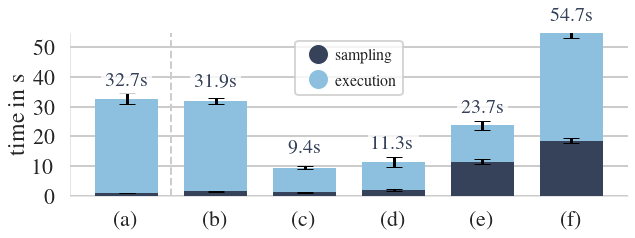

In [72]:
plt.figure(figsize=(10, 3))
w=0.7

sample_col = sns.color_palette()[0]
runtime_col = sns.color_palette()[-1]

n_col = np.array([53, 66, 89]) / 255.0#sns.color_palette()[0]
g_col = np.array([140, 192, 222]) / 255.0 #sns.color_palette()[1]
sample_col = n_col
runtime_col = g_col

plt.bar(np.arange(len(gdf)), gdf[('sampling_time', 'mean')],
        w, color=sample_col,edgecolor='none')
plt.bar(np.arange(len(gdf)), gdf[('job_time_excl_sampling', 'mean')], w, bottom=gdf[('sampling_time', 'mean')],
       color=runtime_col, edgecolor='none')

# plot sampling time on top of bars, b.c. they are so small
vals = gdf[('job_time', 'mean')].values
x_values = np.arange(len(gdf))
y_values = gdf[('job_time', 'mean')]
for x, y, value in zip(x_values, y_values, vals):
    t = plt.text(x, y + 6, '{:.1f}s'.format(value), va='center', fontsize=20, ha='center', color=sample_col)
    t.set_bbox(dict(facecolor='white', alpha=.8, edgecolor='none'))

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')]
y_error = gdf[('sampling_time', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=8, color='k', linewidth=3)

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')] + gdf[('job_time_excl_sampling', 'mean')]
y_error = gdf[('job_time_excl_sampling', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=8, color='k', linewidth=3)

    
plt.ylabel('time in s')
plt.grid(axis='x')
plt.ylim(0, 55)
plt.yticks(np.arange(0, 60, 10))
plt.xticks(np.arange(6), ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)'])

plt.axvline(0.5, lw=2, linestyle='--', color=[.8]*3)

# https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
hlabels=[('sampling', sample_col), ('execution', runtime_col),]
handles = []
for h in hlabels:
    handles.append(Line2D([0], [0], marker='o', color='w', label=h[0],
                        markerfacecolor=h[1], markersize=20))
plt.legend(handles=handles, fontsize=16, handletextpad=0.05)
sns.despine()
plt.savefig('workshop_sampling.pdf', transparent=True, dpi=120, bbox_inches = 'tight', pad_inches = 0)
print('done')

What's the difference between the two ALL files?

 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)'
 
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'

In [63]:
df

,sampling_mode,job_time,metrics,sampling_time,run,job_time_excl_sampling
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.474317,"{'logical_optimization_time_s': 0.0137463, 'll...",0.775935,4,30.698382
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,29.878893,"{'logical_optimization_time_s': 0.0224654, 'll...",1.150490,4,28.728403
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,8.316061,"{'logical_optimization_time_s': 0.0185247, 'll...",0.964578,4,7.351483
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.159707,"{'logical_optimization_time_s': 0.0394885, 'll...",1.418880,4,8.740827
4,SamplingMode.ALL_FILES|FIRST_ROWS,20.294357,"{'logical_optimization_time_s': 0.340269, 'llv...",10.620800,4,9.673557
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,52.301021,"{'logical_optimization_time_s': 0.60232, 'llvm...",17.458100,4,34.842921
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.456474,"{'logical_optimization_time_s': 0.0137409, 'll...",0.882812,5,30.573662
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,30.659847,"{'logical_optimization_time_s': 0.0223129, 'll...",1.137620,5,29.522227
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,16.809237,"{'logical_optimization_time_s': 0.0201565, 'll...",0.932661,5,15.876576
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.587621,"{'logical_optimization_time_s': 0.0394833, 'll...",1.456500,5,9.131121


Could sum different paths for hyperspecialization light experiment. -> i.e. show how much planning time makes + parallelism.

Should contrast that with total Lambda execution time (should sum this up somewhere!)